In [33]:
# Importing necessary libraries
import numpy as np  
import pandas as pd 
import time  
import os  

# Visualization libraries
import matplotlib.pyplot as plt  
import seaborn as sns  

# Scikit-learn preprocessing
from sklearn.preprocessing import LabelEncoder  
from sklearn.preprocessing import RobustScaler  

# Scikit-learn model selection
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV  

# Scikit-learn models
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.svm import SVR 

# Scikit-learn metrics
from sklearn.metrics import (
    mean_absolute_error, 
    mean_squared_error, 
    r2_score 
)

In [34]:
# Load the data
data = pd.read_csv("/kaggle/input/diamonds/diamonds.csv")

In [35]:
# Display the first few records
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# Fields and Data Types 📊:
The dataset includes the following attributes:

* price: price in US dollars $(326 - 18.823)
* carat: weight of the diamond (0.2 - 5.01)
* cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
* color: diamond colour, from J (worst) to D (best)
* clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
* x: length in mm (0 - 10.74)
* y: width in mm (0 - 58.9)
* z: depth in mm (0 - 31.8)
* depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43 - 79)
* table: width of top of diamond relative to widest point (43 - 95)

In [36]:
# Display information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB
None


In [37]:
# The first column seems to be just index
data = data.drop(["Unnamed: 0"], axis=1)
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [38]:
# Display column names
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

# Handling missing data

In [39]:
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

# EDA (Exploratory Data Analysis)

In [40]:
# Display information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB
None


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

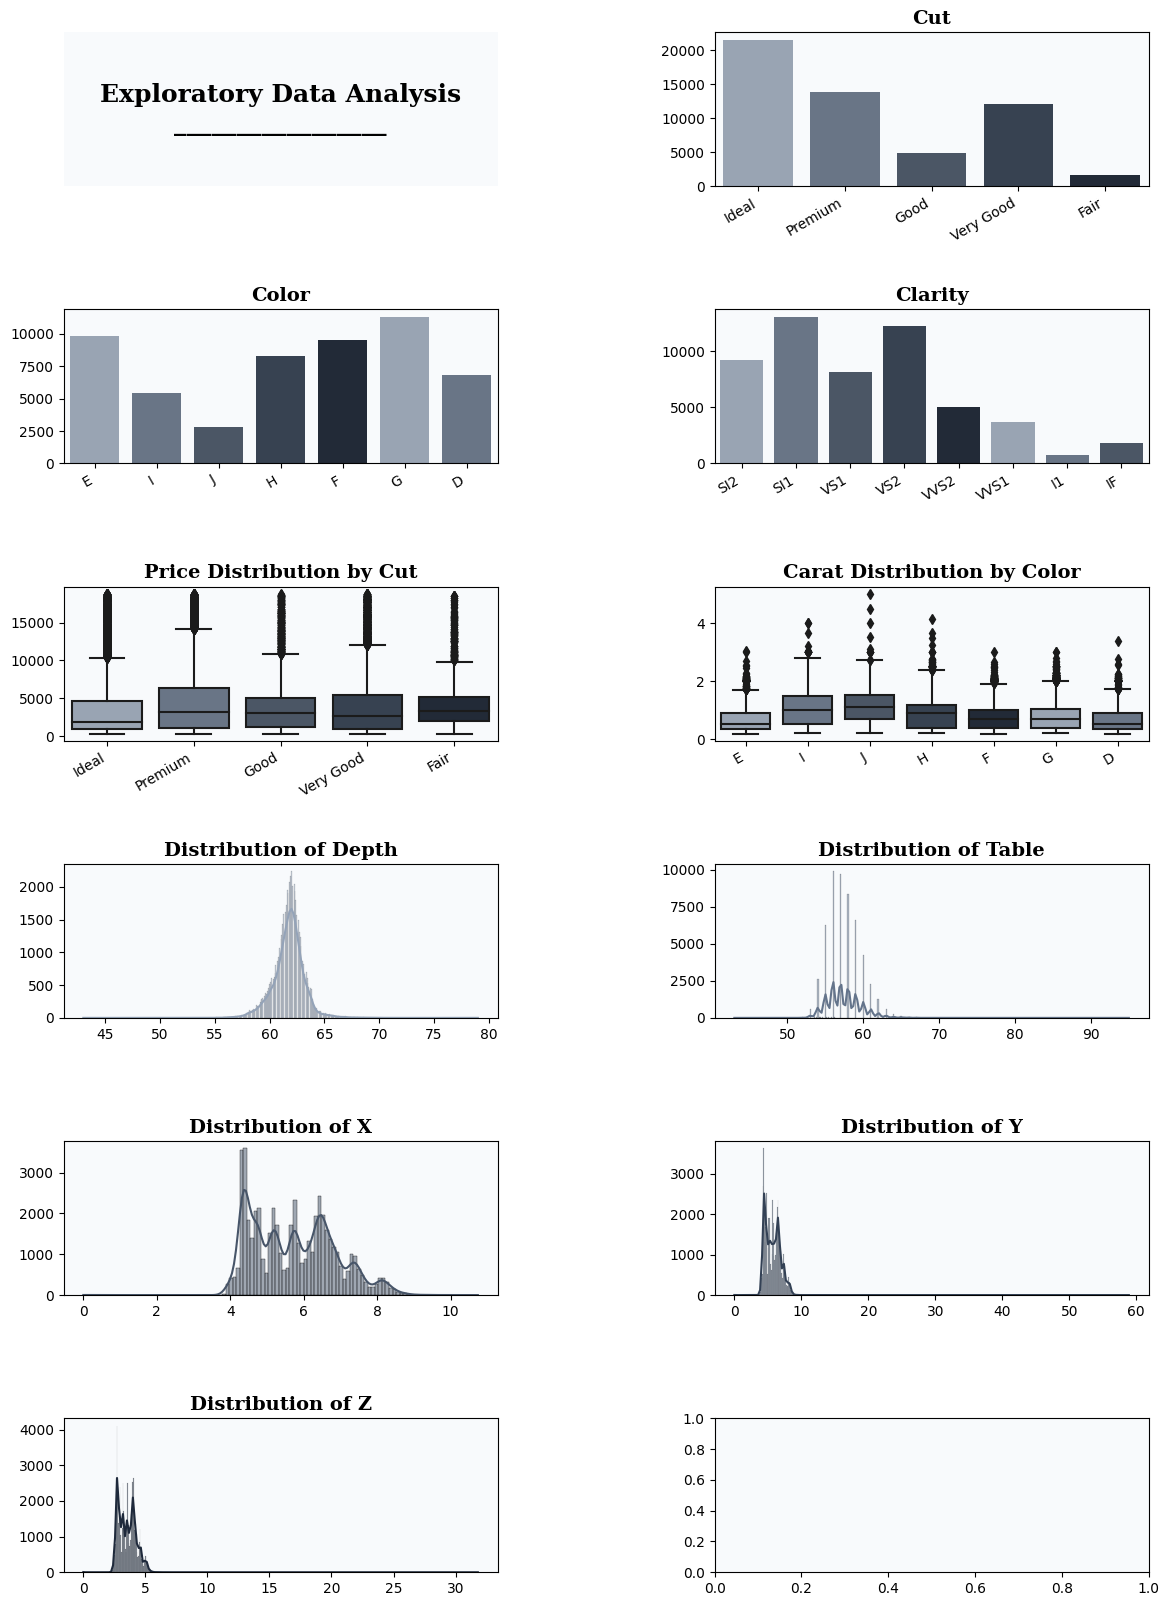

In [41]:
data.replace([np.inf, -np.inf], np.nan, inplace=True)

# General plot settings
background_color = "#f8fafc"
color_palette = ["#94a3b8", "#64748b", "#475569", "#334155", "#1e293b"]

# Adjust figure size and layout
fig = plt.figure(figsize=(14, 20))  
gs = fig.add_gridspec(6, 2)  
gs.update(wspace=0.5, hspace=0.8)  

# Create axes for each subplot
axes = [fig.add_subplot(gs[i, j]) for i in range(6) for j in range(2)]
for ax in axes:
    ax.set_facecolor(background_color)

# Title of the plot
axes[0].spines["bottom"].set_visible(False)
axes[0].spines["left"].set_visible(False)
axes[0].spines["top"].set_visible(False)
axes[0].spines["right"].set_visible(False)
axes[0].tick_params(left=False, bottom=False)
axes[0].set_xticklabels([])
axes[0].set_yticklabels([])
axes[0].text(0.5, 0.5,
             'Exploratory Data Analysis\n_________________',
             horizontalalignment='center',
             verticalalignment='center',
             fontsize=18, fontweight='bold',
             fontfamily='serif',
             color="#000000")

# Count plots for categorical features
categorical_features = ['cut', 'color', 'clarity']
titles = ['Cut', 'Color', 'Clarity']

for i, feature in enumerate(categorical_features):
    ax = axes[i + 1]  # Position the subplot
    sns.countplot(ax=ax, data=data, x=feature, palette=color_palette)
    ax.set_title(titles[i], loc='center', fontsize=14, fontweight='bold', fontfamily="serif", color="#000000")
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right', fontsize=10)

# Boxplots for numerical vs. categorical relationships
num_features = ['price', 'carat']
boxplot_titles = ['Price Distribution by Cut', 'Carat Distribution by Color']
boxplot_pairs = [(num_features[0], categorical_features[0]), (num_features[1], categorical_features[1])]

for i, (num, cat) in enumerate(boxplot_pairs):
    ax = axes[i + 4]
    sns.boxplot(ax=ax, data=data, x=cat, y=num, palette=color_palette)
    ax.set_title(boxplot_titles[i], loc='center', fontsize=14, fontweight='bold', fontfamily="serif", color="#000000")
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right', fontsize=10)

# Distribution plots for numerical features
numerical_features = ['depth', 'table', 'x', 'y', 'z'] 

for i, feature in enumerate(numerical_features):
    ax = axes[i + 6]  
    sns.histplot(ax=ax, data=data, x=feature, kde=True, color=color_palette[i % len(color_palette)])
    ax.set_title(f"Distribution of {feature.capitalize()}", loc='center', fontsize=14, fontweight='bold', fontfamily="serif", color="#000000")
    ax.set_xlabel("")
    ax.set_ylabel("")

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable 

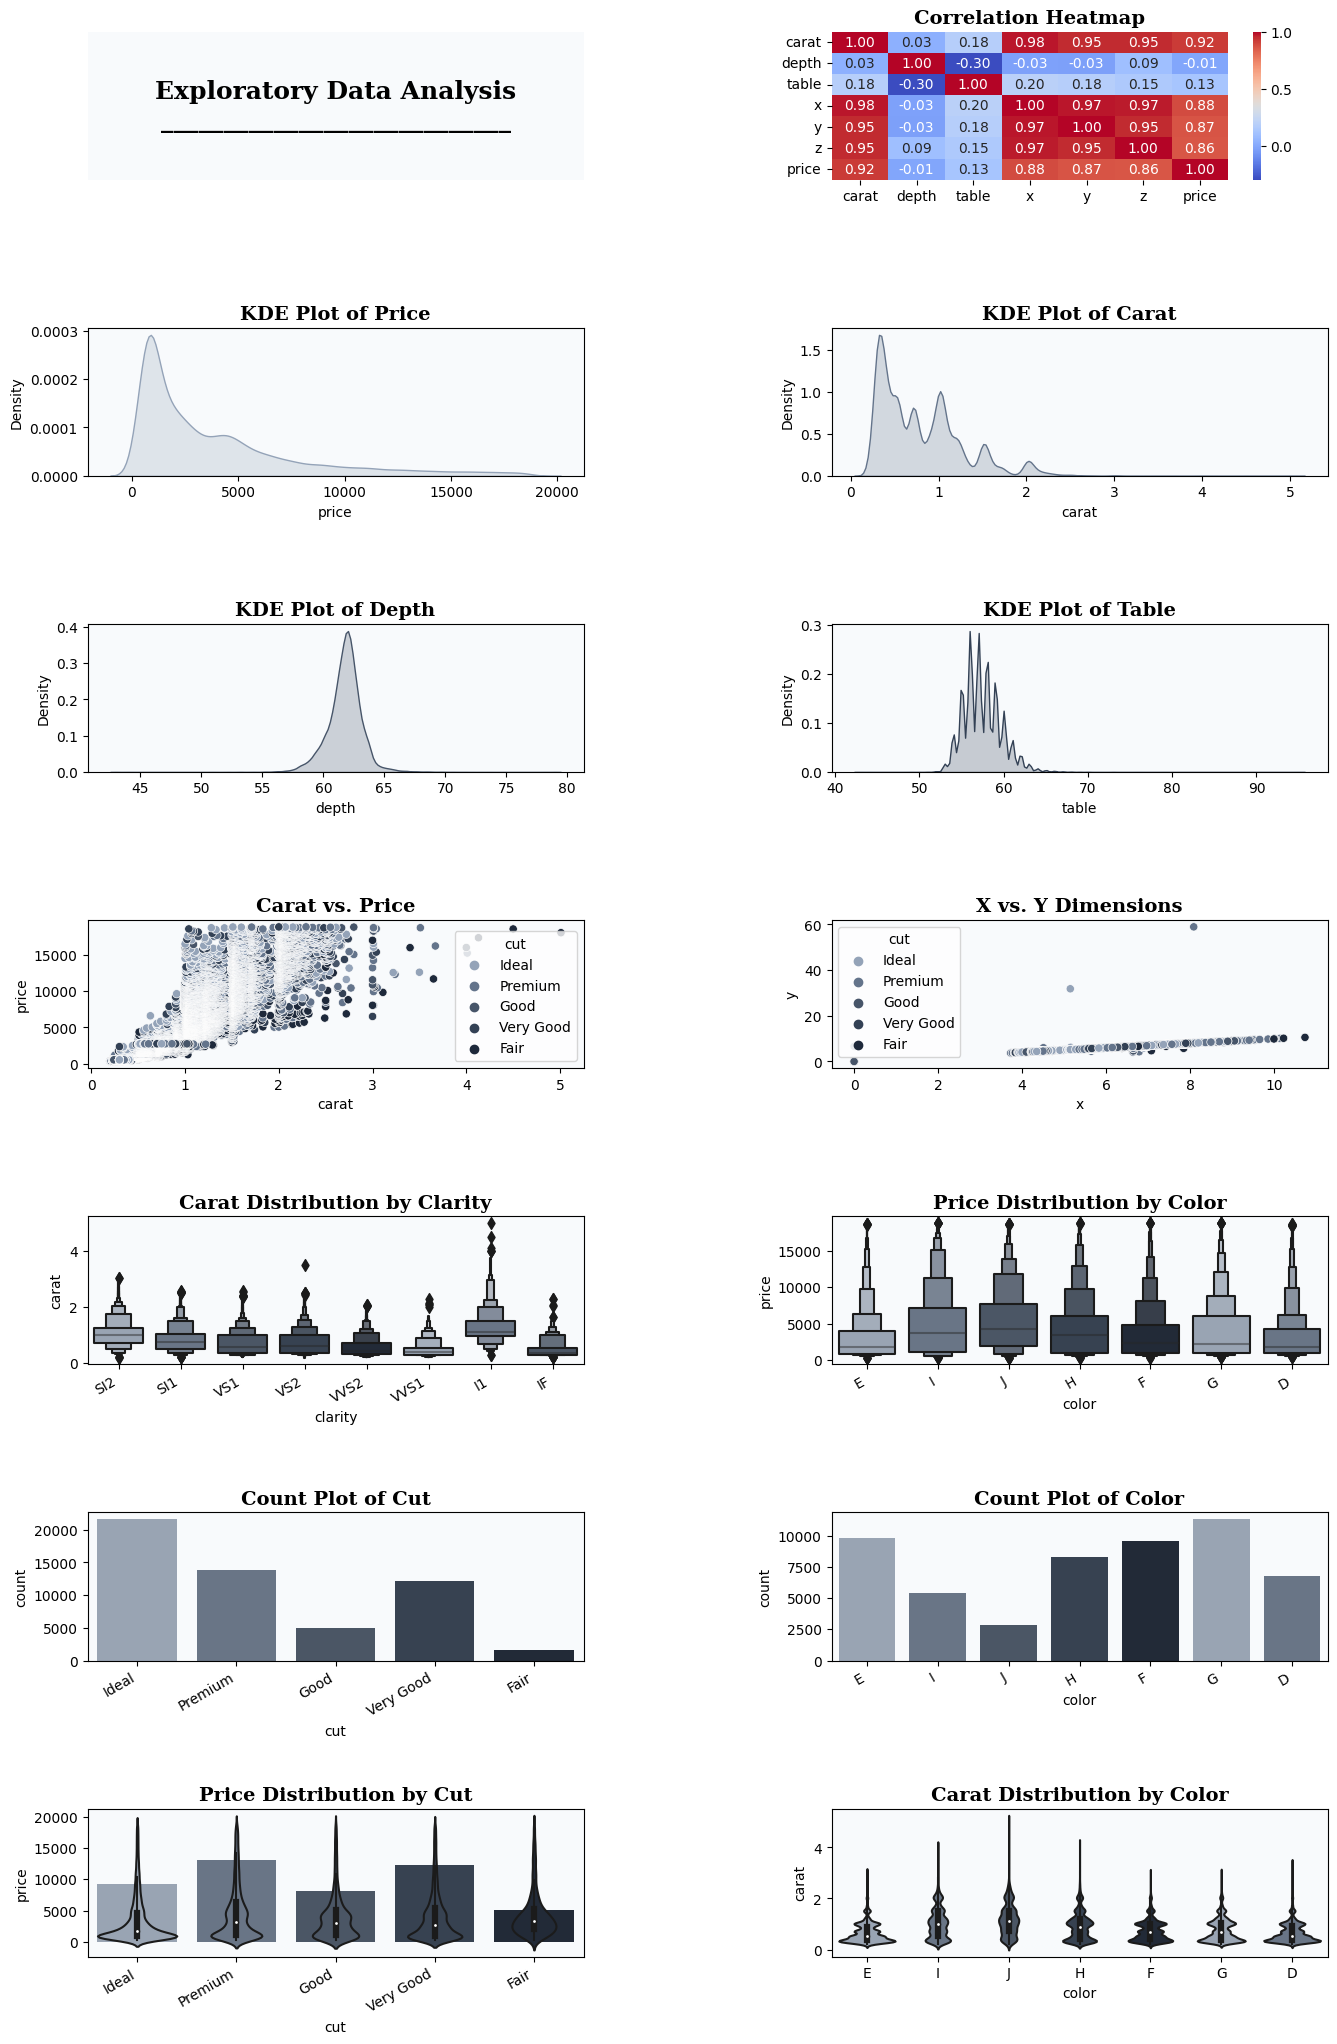

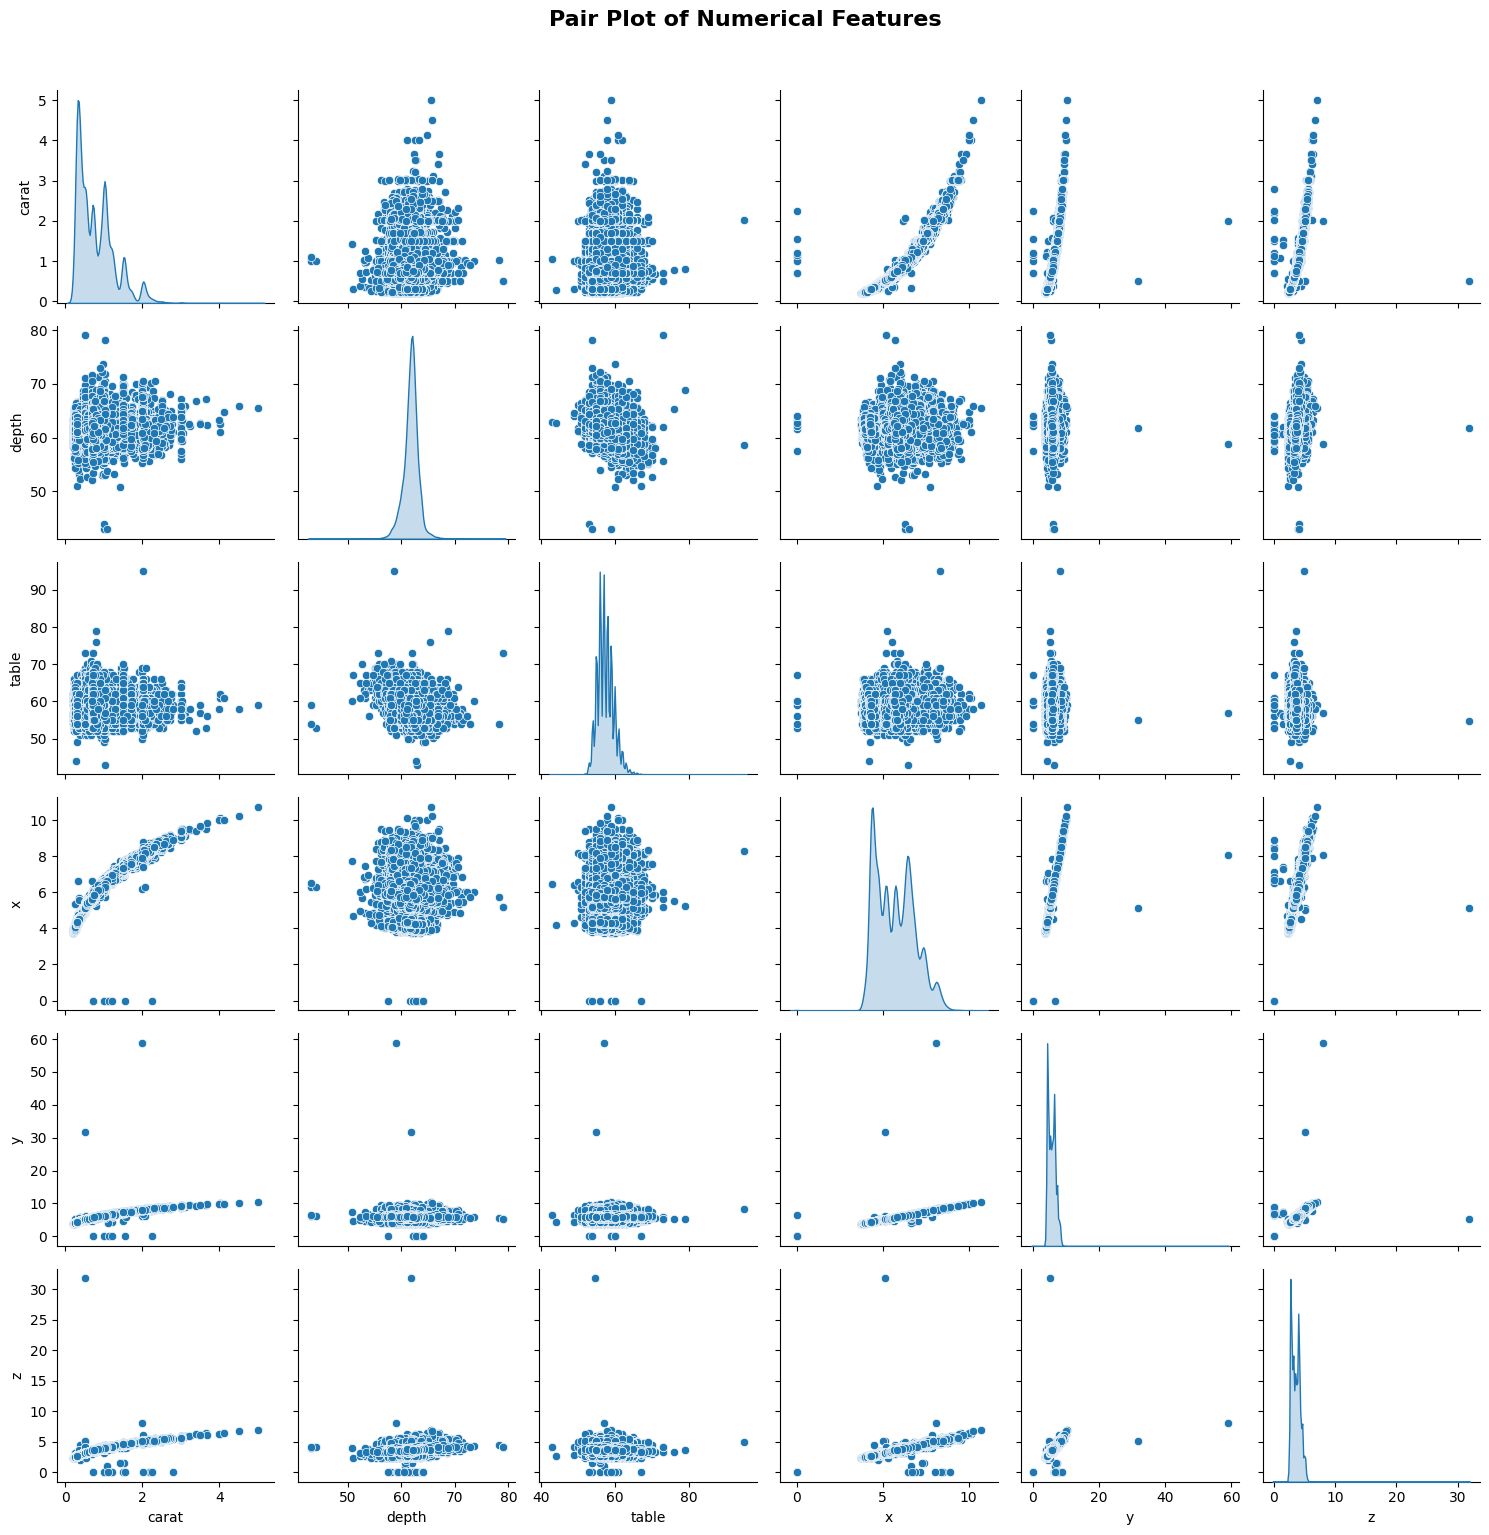

In [42]:
# Define general settings
background_color = "#f8fafc"
color_palette = ["#94a3b8", "#64748b", "#475569", "#334155", "#1e293b"]

# Adjust figure size and layout
fig = plt.figure(figsize=(16, 25))  
num_rows, num_cols = 7, 2 
gs = fig.add_gridspec(num_rows, num_cols)
gs.update(wspace=0.5, hspace=1) 

# Create subplot axes
axes = [fig.add_subplot(gs[i, j]) for i in range(num_rows) for j in range(num_cols)]
for ax in axes:
    ax.set_facecolor(background_color)

# Title for the entire EDA
axes[0].spines["bottom"].set_visible(False)
axes[0].spines["left"].set_visible(False)
axes[0].spines["top"].set_visible(False)
axes[0].spines["right"].set_visible(False)
axes[0].tick_params(left=False, bottom=False)
axes[0].set_xticklabels([])
axes[0].set_yticklabels([])
axes[0].text(0.5, 0.5,
             'Exploratory Data Analysis\n____________________________',
             horizontalalignment='center',
             verticalalignment='center',
             fontsize=18, fontweight='bold',
             fontfamily='serif',
             color="#000000")

# Pair plot for numerical features
sns.pairplot(data=data, vars=['carat', 'depth', 'table', 'x', 'y', 'z'], 
             diag_kind="kde", palette=color_palette)
plt.suptitle('Pair Plot of Numerical Features', fontsize=16, fontweight='bold', y=1.02)

# Heatmap for correlation between numerical features
corr = data[['carat', 'depth', 'table', 'x', 'y', 'z', 'price']].corr()
sns.heatmap(ax=axes[1], data=corr, annot=True, cmap="coolwarm", fmt=".2f")
axes[1].set_title("Correlation Heatmap", fontsize=14, fontweight='bold', fontfamily="serif", color="#000000")

# KDE plots for numerical features
numerical_features = ['price', 'carat', 'depth', 'table']
for i, feature in enumerate(numerical_features):
    sns.kdeplot(ax=axes[i + 2], data=data, x=feature, fill=True, color=color_palette[i % len(color_palette)])
    axes[i + 2].set_title(f"KDE Plot of {feature.capitalize()}", fontsize=14, fontweight='bold', fontfamily="serif", color="#000000")

# Scatter plots for relationships between features
scatter_pairs = [('carat', 'price'), ('x', 'y')]
scatter_titles = ["Carat vs. Price", "X vs. Y Dimensions"]
for i, (x, y) in enumerate(scatter_pairs):
    sns.scatterplot(ax=axes[i + 6], data=data, x=x, y=y, hue='cut', palette=color_palette)
    axes[i + 6].set_title(scatter_titles[i], fontsize=14, fontweight='bold', fontfamily="serif", color="#000000")

# Boxen plots for outlier analysis
boxen_features = ['carat', 'price']
boxen_titles = ["Carat Distribution by Clarity", "Price Distribution by Color"]
for i, (num, cat) in enumerate(zip(boxen_features, ['clarity', 'color'])):
    sns.boxenplot(ax=axes[i + 8], data=data, x=cat, y=num, palette=color_palette)
    axes[i + 8].set_title(boxen_titles[i], fontsize=14, fontweight='bold', fontfamily="serif", color="#000000")
    axes[i + 8].set_xticklabels(axes[i + 8].get_xticklabels(), rotation=30, ha='right', fontsize=10)

# Count plots for categorical features
categorical_features = ['cut', 'color', 'clarity']
for i, feature in enumerate(categorical_features):
    sns.countplot(ax=axes[i + 10], data=data, x=feature, palette=color_palette)
    axes[i + 10].set_title(f"Count Plot of {feature.capitalize()}", fontsize=14, fontweight='bold', fontfamily="serif", color="#000000")
    axes[i + 10].set_xticklabels(axes[i + 10].get_xticklabels(), rotation=30, ha='right', fontsize=10)

# Violin plots for categorical vs. numerical analysis
violin_pairs = [('price', 'cut'), ('carat', 'color')]
violin_titles = ["Price Distribution by Cut", "Carat Distribution by Color"]
for i, (num, cat) in enumerate(violin_pairs):
    sns.violinplot(ax=axes[i + 12], data=data, x=cat, y=num, palette=color_palette) # Cambia a i + 12 para evitar el desbordamiento
    axes[i + 12].set_title(violin_titles[i], fontsize=14, fontweight='bold', fontfamily="serif", color="#000000")

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


# Data Cleaning

In [43]:
# Removing the datapoints having min 0 value in either x, y or z features 
data = data.drop(data[data["x"]==0].index)
data = data.drop(data[data["y"]==0].index)
data = data.drop(data[data["z"]==0].index)
data.shape

(53920, 10)

# Removing outliers

In [44]:
# Dropping the outliers (since we have huge dataset) by defining appropriate measures across features 
data = data[(data["depth"]<75)&(data["depth"]>45)]
data = data[(data["table"]<80)&(data["table"]>40)]
data = data[(data["x"]<40)]
data = data[(data["y"]<40)]
data = data[(data["z"]<40)&(data["z"]>2)]
data.shape 

(53909, 10)

# Encoding Categorical Variables

In [45]:
# Making a copy to keep original data in its form intact
data_copy = data.copy()

# Applying label encoder to columns with categorical data
columns = ['cut','color','clarity']
label_encoder = LabelEncoder()
for col in columns:
    data_copy[col] = label_encoder.fit_transform(data_copy[col])
data_copy.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53909.000000,53909.000000,53909.000000,53909.000000,53909.000000,53909.000000,53909.000000,53909.000000,53909.000000,53909.000000
mean,0.797617,2.553396,2.593964,3.835575,61.749743,57.455852,3930.513680,5.731441,5.733764,3.539994
std,0.473759,1.027444,1.701283,1.724540,1.420093,2.226169,3987.145802,1.119369,1.116891,0.702085
min,0.200000,0.000000,0.000000,0.000000,50.800000,43.000000,326.000000,3.730000,3.680000,2.060000
25%,0.400000,2.000000,1.000000,2.000000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,2.000000,3.000000,4.000000,61.800000,57.000000,2400.000000,5.700000,5.710000,3.530000
75%,1.040000,3.000000,4.000000,5.000000,62.500000,59.000000,5322.000000,6.540000,6.540000,4.040000
max,5.010000,4.000000,6.000000,7.000000,73.600000,79.000000,18823.000000,10.740000,31.800000,31.800000


<Axes: >

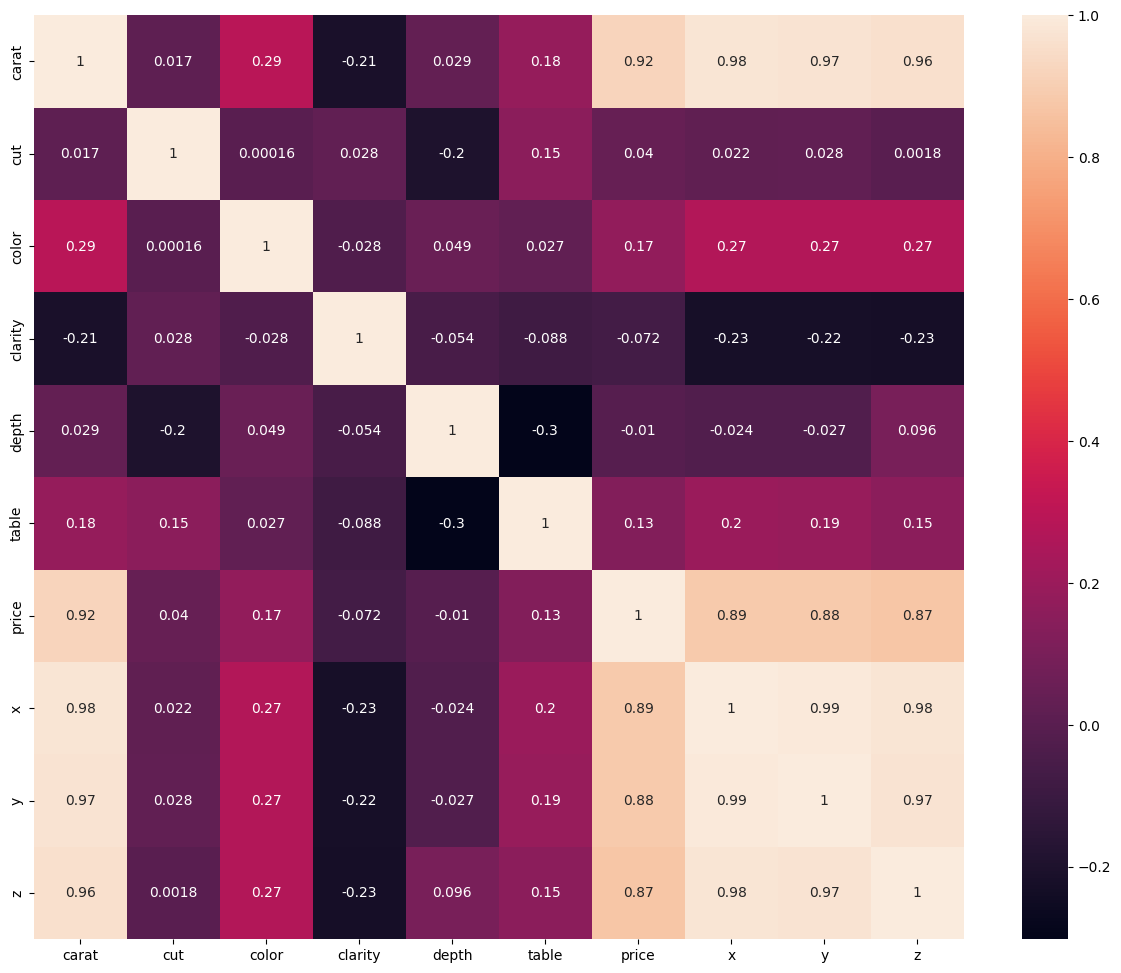

In [46]:
# Examining correlation matrix using heatmap
cmap = sns.diverging_palette(205, 133, 63, as_cmap=True)
corrmat= data_copy.corr()
f, ax = plt.subplots(figsize=(15,12))
sns.heatmap(corrmat,annot=True)

# Data Modeling

In [47]:
# Defining the independent and dependent variables
X= data_copy.drop(["price"],axis =1)
y= data_copy["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=25)

In [48]:
# Apply label encoding for categorical features
categorical_cols = X.select_dtypes(include=['object']).columns
label_encoders = {col: LabelEncoder() for col in categorical_cols}

for col in categorical_cols:
    X[col] = label_encoders[col].fit_transform(X[col])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale numerical features using RobustScaler
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns
scaler = RobustScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# Define models for comparison
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=100),
    "Support Vector Regression": SVR(kernel='rbf')
}

# Initialize a dictionary to store results
results = {}

# Train and evaluate each model
for name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    elapsed_time = time.time() - start_time
    
    # Evaluate model performance
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Store results
    results[name] = {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R^2": r2,
        "Time (s)": elapsed_time
    }

# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results).transpose()
print("Model Comparison Results:")
print(results_df)

# Define the parameter grid for Random Forest tuning
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [3, 5, 7],
    'min_samples_split': [10, 20, 30],
    'min_samples_leaf': [5, 10, 15],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Initialize the Random Forest model
rf = RandomForestRegressor(random_state=42)

# Perform GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Display best parameters and best score
print("Best Parameters from GridSearchCV:", grid_search.best_params_)
print("Best Score (Negative MSE):", -grid_search.best_score_)

# Evaluate the best model on the test set
best_rf = grid_search.best_estimator_
y_pred_rf = best_rf.predict(X_test)

# Metrics for the best Random Forest model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"\nRandom Forest Performance on Test Set:\n"
      f"MAE: {mae_rf}\nMSE: {mse_rf}\nRMSE: {rmse_rf}\nR^2: {r2_rf}")

Model Comparison Results:
                                   MAE           MSE         RMSE       R^2  \
Linear Regression           860.888737  2.028474e+06  1424.244942  0.868026   
Decision Tree               355.003339  5.330329e+05   730.091042  0.965320   
Random Forest               265.436360  2.892265e+05   537.797849  0.981183   
Support Vector Regression  1356.766370  7.452048e+06  2729.843902  0.515164   

                             Time (s)  
Linear Regression            0.019482  
Decision Tree                0.338110  
Random Forest               19.248535  
Support Vector Regression  123.776900  
Best Parameters from GridSearchCV: {'bootstrap': True, 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 150}
Best Score (Negative MSE): 762456.2836732233

Random Forest Performance on Test Set:
MAE: 469.9767827437659
MSE: 760805.353259393
RMSE: 872.2415681790183
R^2: 0.950501390603297
